##Подготовка

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd # загружаем библиотеку и для простоты обращения в коде называем её сокращенно pd
import numpy as np
import matplotlib.pyplot as plt # загружаем библиотеку и для простоты обращения в коде называем её сокращенно plt
# указываем, чтобы картинки отображались прямо в ноутбуке 
%matplotlib inline 

In [ ]:
%%capture
!wget https://www.dropbox.com/s/afwb0tnqm9izxha/predict_house_price_training_data.xlsx
!wget https://www.dropbox.com/s/sur2avqf4n5f4az/predict_house_price_test_data.xlsx

In [ ]:
training_data = pd.read_excel('predict_house_price_training_data.xlsx') # загружаем таблицу в переменную training_data
target_variable_name = 'Целевая.Цена'
training_values = training_data[target_variable_name]
training_points = training_data.drop(target_variable_name, axis=1)

In [ ]:
test_data = pd.read_excel('predict_house_price_test_data.xlsx')
test_values = test_data[target_variable_name]
test_points = test_data.drop(target_variable_name, axis=1)

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
linear_regression_model = linear_model.LinearRegression()
scaler = StandardScaler()
training_points_scaled = scaler.fit_transform(training_points)
linear_regression_model.fit(training_points_scaled, training_values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Задание 3.5


Реализуйте настройку параметров модели не с помощью встроенной функции, а с помощью своей реализации.

Настроить параметры нужно либо с помощью **стохастического градиентного спуска** либо с помощью **mini-batch градиентного спуска**. 
Нужно использовать регуляризацию **L1, L2 или Elastic Net**. 

Переделал свой стохастический градиентный спуск в классовую интерпретацию, добавив критерий остановки, пересмотрев систему рассчета ошибки и предсказаний. Также добавил функцию вывода графика для L2 и без него.

In [ ]:
import numpy as np

class SGD_L2:
    def __init__(self, step, epoch, l2, sign):
        self.step = step
        self.epoch = epoch
        self.l2 = l2
        self.sign = sign
        self.learning_rate_data_l2 = []
        self.w = None
        self.X = None
        self.y = None
        self.b = None
        self.eps = None
        self.size_random = None
        self.size_w = None

    def data_fit(self, X, y, eps=0.00001):
        self.size_random, self.size_w = X.shape
        self.w = np.zeros(self.size_w)
        self.b = 0
        self.eps = eps
        self.X = X
        self.y = y
        for i in range(self.epoch):
          if self.__grad_step():
              break
        return self
    def __grad_step(self):
        prediction_sgd = self.predict(self.X)
        indr = np.random.randint(0, self.size_random)
        w_reinit = self.w.copy()
        error = prediction_sgd[indr] - self.y[indr]
        self.learning_rate_data_l2.append(abs(error))
        Sumw = self.w.sum()
        for j in range(self.size_w):
            if self.sign == True:
              w_reinit[j] = self.w[j] - (2 * self.step * error * self.X[indr][j] + 2 * self.l2 * Sumw)
            else:
              w_reinit[j] = self.w[j] - (2 * self.step * error * self.X[indr][j])
        exit = False
        if self.sign == True:
          grad_b = 2 * self.step * error + 2 * self.l2 * Sumw
        else:
          grad_b = 2 * self.step * error
        if max((self.w - w_reinit).max(), grad_b) < self.eps:
            exit = True
        self.w = w_reinit
        self.b = self.b - grad_b
        return exit
    def predict(self, X):
        return X.dot(self.w) + self.b

    def plot_learning_rate_l2(self):
      plt.figure(figsize=(10, 5))
      plt.plot(self.learning_rate_data_l2)
      plt.xlabel('Номер итерации')
      plt.ylabel('Ошибка')
      plt.show()

##Задание 3.6

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
sgdr = SGD_L2(step=0.001, epoch=1_000, l2=0.00001, sign=True)
sgdr.data_fit(training_points_scaled, training_values)
test_predictions_linear_custom = sgdr.predict(test_points)
test_predictions_linear = linear_regression_model.predict(test_points)
mean_absolute_error_linear_model = mean_absolute_error(test_values, test_predictions_linear) 
mean_squared_error_linear_model = mean_squared_error(test_values, test_predictions_linear)

mean_absolute_error_sgd = mean_absolute_error(test_values, test_predictions_linear_custom) 
mean_squared_error_sgd = mean_squared_error(test_values, test_predictions_linear_custom)

mae_sgd = mean_absolute_error_sgd
mae_lr = mean_absolute_error_linear_model

res = pd.DataFrame(columns=['Type', 'MAE', 'MSE', 'RMSE'])
res['Type'] = ['SGD', 'Sklearn']
res['MAE'] = [mae_sgd, mae_lr]
res['MSE'] = [mean_squared_error_sgd, mean_squared_error_linear_model]
res['RMSE'] = [np.sqrt(mean_squared_error_sgd), np.sqrt(mean_squared_error_linear_model)]
res

,Type,MAE,MSE,RMSE
0,SGD,1.931723e+08,3.031429e+17,5.505842e+08
1,Sklearn,1.833755e+08,5.471988e+16,2.339228e+08


##Дополнительное задание к 3.6

C L2-регуляризацией


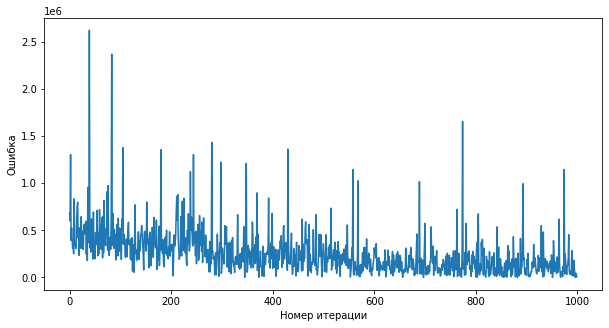

Без L2-регуляризации


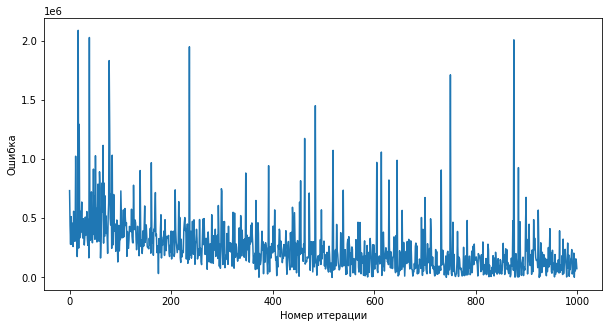

In [ ]:
print("C L2-регуляризацией")
sgdr_1 = SGD_L2(step=0.001, epoch=1_000, l2=0.00001, sign=True)
sgdr_1.data_fit(training_points_scaled, training_values)
sgdr_1.plot_learning_rate_l2()
print("Без L2-регуляризации")
sgdr_2 = SGD_L2(step=0.001, epoch=1_000, l2=0.00001, sign=False)
sgdr_2.data_fit(training_points_scaled, training_values)
sgdr_2.plot_learning_rate_l2()


По построенной мной модели на основе стохастического градиентного спуска и на основе Линейной регрессии видно, что лучше себя проявляет Линейная регрессия. В отличие от нее, для ожидаемой функциональности стохастического градиентного спуска необходимо тщательно подбирать параметры.

## Задание 3.7 

In [ ]:
## введите свой код
## напишите код, который вычисляет значимость признака (фактически это просто вес по модулю)
from sklearn.linear_model import *

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
training_points_3_7 = scaler.fit_transform(training_points)
testing_points_3_7 = scaler.transform(test_points)

model = linear_model.LinearRegression()
model.fit(training_points_3_7, training_values)

feature_importance = pd.DataFrame(columns=['Название признака', 'Важность признака'])
feature_importance['Название признака'] = test_data.columns[1:16]
feature_importance['Важность признака'] = abs(model.coef_)
feature_importance.sort_values(by='Важность признака', ascending=False)

,Название признака,Важность признака
8,Оценка риелтора,116577.366181
2,Жилая площадь,86664.293134
9,Площадь без подвала,82691.723728
13,Широта,79047.942776
11,Год постройки,71827.278259
5,Вид на воду,50962.118212
6,Просмотрены ранее,38203.271673
1,Ванные,33055.646855
0,Спальни,31500.701385
10,Площадь подвала,24394.133310


## Задание 3.8. 

Напомню исходную постановку задачи. Мы говорили о том, что оценка цены на недвижимость может быть нужна для выявления аномально низких цен на объект недвижимости. Давайте попробуем найти такие в датасете.

Прочитаем данные снова в отдельную переменную. Затем предскажем значения по нормализованным данным. После этого втсавим в датафрейм столбец с разницей между реальным значением цены и предсказанным. Если эта разница меньше 0, то это аномально низкая цена и мы ее выводим. Выводим датафрейм 

In [ ]:
df = pd.read_excel('predict_house_price_test_data.xlsx')
test_predictions_linear_test = model.predict(testing_points_3_7)
df.insert(1, 'test_predictions_linear',test_values - test_predictions_linear_test)
df[df['test_predictions_linear'] < 0].sort_values(by='test_predictions_linear', ascending=True).head(20)

,Целевая.Цена,test_predictions_linear,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
632,425000,-1.250003e+06,3,2.75,3610,107386,1.5,1,3,3,8,3130,480,1918,1962,47.3351,-122.362
4675,380000,-1.079378e+06,3,2.50,1980,17342,2.0,1,4,3,10,1580,400,1984,0,47.4551,-122.373
1032,2280000,-1.002973e+06,7,8.00,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,47.6675,-121.986
4270,995000,-9.546501e+05,3,4.50,4380,47044,2.0,1,3,3,9,3720,660,1968,1990,47.4734,-122.365
3502,400000,-9.286053e+05,3,2.50,2090,32718,2.0,1,4,3,7,1550,540,1919,1983,47.3338,-122.511
2765,357000,-9.217022e+05,3,2.00,2460,53882,1.0,1,4,3,7,2460,0,1955,0,47.3811,-122.325
2426,600000,-7.917783e+05,2,2.25,2320,18919,2.0,1,4,4,8,2320,0,1976,0,47.3905,-122.462
4838,1110000,-7.340025e+05,5,3.50,7350,12231,2.0,0,4,3,11,4750,2600,2001,0,47.5373,-121.865
842,345600,-7.011154e+05,5,3.50,2800,5120,2.5,0,0,3,9,2800,0,1903,2005,47.6059,-122.310
4643,650000,-6.838929e+05,3,1.75,2800,19386,1.0,1,4,3,8,1400,1400,1965,0,47.3554,-122.324
